# The purpose

In any language there is structure in a sentence; verbs communicate action, nouns represent entities, and adjectives describe.

For a single word, synonyms represent a word that has the same or nearly the same meaning that can serve as a substitute. These relationships are curated/stored manually in thesauruses.

However, there are relationships between words that are not synonyms - i.e. both a car and a horse can be means of conveyance (although a horse also exists on its own, unlike a car). What we desire is to build a framework that allows us to identify similarities in words and their meanings that extends beyond substitutable words.

This effort/project would be far too large to be undertaken by humans, the question is how we could quantitatively tackle it. 

# Exploiting structure

Fortunately, languages are constructed as such that there is some similarity in sentence structure and word usage when we attempt to express similar concepts.

*I rode in the car into town.* 

*I rode the horse into town.*

Not **exactly** the same, which makes this task difficult, but sufficiently similar to undertake the task.

# Vectors and matrices - verbal similarity to numeric distance

The basic concept - take words and according to how they are used in bodies of text, encode them in a n-dimensional space. Since there is no starting cartesian coordinate for a word, we have to essentially situate all of the words based on their co-occurences in sentences together. Words that are never together shouldn't be right next to each other, but if they are used in sentences similarly then the direction/magnitude of their relationships should be similar (although distant in vector space).

In [1]:
8 + 4

12

<img src='../images/word_matrix.jpg' width='400px'></img>

# Converting context into numbers

There multiple approaches for encoding verbal context into numeric distances, we are going to explore *k-skip n-grams*, which is one of the approaches.

# k-skip n-grams

Once we detail it, then name gives it away. A k-skip n-gram specifies that you will create all n-grams in a sentence up to k-skips away. Similar to a rolling average, k is our window length. So if we take the sentence:

*I ran to the store to pick up milk.*

and said that we should do **bi-grams**, then we would have

`[('I', 'ran'), ('ran', 'to'), ('the', 'store'), ('store', 'to'), ('to', 'pick'), ('pick', 'up'), ('up', 'milk')]`

which is 7 bi-grams.

If I then asked for **1-skip bi-grams**, then we would have:

`[(I, ran), (I, to), (ran, to), (ran, the), (to, the), (to, store), (the, store), (the, to), (store, to), (store, pick), (to, pick), (to, up), (pick, up), (pick, milk), (up, milk)]`

which is 15 bi-grams. 

You can use any combination of `n` and `k` that you desire, but it is already to easy to see how the number of word combinations explodes as `n` and `k` increase for even a single sentence. 

In [30]:
from nltk.util import skipgrams

sentence = ['I', 'ran', 'to', 'the', 'store', 'to', 'pick', 'up', 'milk']
list( skipgrams(sentence, 2, 0) )

[('I', 'ran'),
 ('ran', 'to'),
 ('to', 'the'),
 ('the', 'store'),
 ('store', 'to'),
 ('to', 'pick'),
 ('pick', 'up'),
 ('up', 'milk')]

In [31]:
list( skipgrams(sentence, 2, 1) )

[('I', 'ran'),
 ('I', 'to'),
 ('ran', 'to'),
 ('ran', 'the'),
 ('to', 'the'),
 ('to', 'store'),
 ('the', 'store'),
 ('the', 'to'),
 ('store', 'to'),
 ('store', 'pick'),
 ('to', 'pick'),
 ('to', 'up'),
 ('pick', 'up'),
 ('pick', 'milk'),
 ('up', 'milk')]

In [32]:
list( skipgrams(sentence, 2, 2) )

[('I', 'ran'),
 ('I', 'to'),
 ('I', 'the'),
 ('ran', 'to'),
 ('ran', 'the'),
 ('ran', 'store'),
 ('to', 'the'),
 ('to', 'store'),
 ('to', 'to'),
 ('the', 'store'),
 ('the', 'to'),
 ('the', 'pick'),
 ('store', 'to'),
 ('store', 'pick'),
 ('store', 'up'),
 ('to', 'pick'),
 ('to', 'up'),
 ('to', 'milk'),
 ('pick', 'up'),
 ('pick', 'milk'),
 ('up', 'milk')]

In [33]:
list( skipgrams(sentence, 3, 2) )

[('I', 'ran', 'to'),
 ('I', 'ran', 'the'),
 ('I', 'ran', 'store'),
 ('I', 'to', 'the'),
 ('I', 'to', 'store'),
 ('I', 'the', 'store'),
 ('ran', 'to', 'the'),
 ('ran', 'to', 'store'),
 ('ran', 'to', 'to'),
 ('ran', 'the', 'store'),
 ('ran', 'the', 'to'),
 ('ran', 'store', 'to'),
 ('to', 'the', 'store'),
 ('to', 'the', 'to'),
 ('to', 'the', 'pick'),
 ('to', 'store', 'to'),
 ('to', 'store', 'pick'),
 ('to', 'to', 'pick'),
 ('the', 'store', 'to'),
 ('the', 'store', 'pick'),
 ('the', 'store', 'up'),
 ('the', 'to', 'pick'),
 ('the', 'to', 'up'),
 ('the', 'pick', 'up'),
 ('store', 'to', 'pick'),
 ('store', 'to', 'up'),
 ('store', 'to', 'milk'),
 ('store', 'pick', 'up'),
 ('store', 'pick', 'milk'),
 ('store', 'up', 'milk'),
 ('to', 'pick', 'up'),
 ('to', 'pick', 'milk'),
 ('to', 'up', 'milk'),
 ('pick', 'up', 'milk')]

Relatively simple to calculate quickly with nltk. Writing our own function wouldn't be awful either, we would just want to make use of the `collections` library and use the combination/permutation functions. 

As a quick test, I am want you to load one the WoS data and calculate how many skip-grams there are for one journal (take your pick of `n` and `k`).

In [36]:
#Exercise
import json
wosdata = json.load(open('../data/wos_topic_doc.json'))

wosdata.keys()


dict_keys(['AMERICAN_ECONOMIC_REVIEW', 'SCIENCE', 'SCHIZOPHRENIA_BULLETIN', 'CELL', 'ASTRONOMICAL_JOURNAL', 'JOURNAL_OF_DIFFERENTIAL_EQUATIONS', 'GEOLOGY'])

In [47]:
for skipn in [0, 1, 2, 3, 4]:
    skip_count = 0
    for entry in wosdata['AMERICAN_ECONOMIC_REVIEW']:
        skip_count += len( list(skipgrams(entry, 4, skipn)) )
    print(skipn, skip_count)

0 56713
1 224155
2 553645
3 1093805
4 1890560


In [44]:
skip_count

116123

In [48]:
len(wosdata['AMERICAN_ECONOMIC_REVIEW'])

899

# How does this fit in?

The trick is that we turn this into a prediction problem. When we look at the sentence

`I ran to the store to pick up milk.`

and we construct a skip-gram

`['ran', 'to', 'store']`

there is the skipped word

`'the'`

which we could set up as a `(context, target)` pair

`(['ran', 'to', 'store'], 'the')`

We could set this up as a problem when we input `['ran', 'to', 'store']` to predict `the` or use `the` to predict its context words. 

# Setting up the prediction problem

There are two ways that we can go about this - one is to use the skip grams model we already set up

<img src='../images/skipgram.png'></img>

the embedding then is the learned weights in the projection layer.  This works best when we have a very large dataset.

The alternative is the continuous bag of words

<img src='../images/cbow.png'></img>

with this approach, we use the context to predict the target. This averages out the noise of individual words contribution to context, which makes it workable with smaller datasets.

# A primer on neural nets

<img src='../images/l9_neuralnet_-1.png'></img>

<img src='../images/l9_neuralnet_0.png'></img>

<img src='../images/l9_neuralnet_1.png' width='600px'></img>

<img src='../images/l9_neuralnet_2.png' width='600px'></img>

<img src='../images/l9_neuralnet_3.png' width='600px'></img>

<img src='../images/l9_neuralnet_4.png' width='600px'></img>

# Calculating error in a neural network

In [49]:

from IPython.display import HTML

# Youtube
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/Ilg3gGewQ5U?rel=0" frameborder="0" allow="autoplay; encrypted-media" allowfullscreen></iframe>')

# A simple neural network example with TensorFlow

TensorFlow is the neural network library that Google open-sourced. It has rapidly become one of the default libraries to use when creating/training neural networks.

In [50]:
!pip install tensorflow

In [52]:
%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
print("You have version %s" % tf.__version__)

You have version 1.6.0


To start we will do a **very** simple linear regression example as a neural network.

To make this simple, we will just generate some data with noise

In [53]:
def make_noisy_data(m=0.1, b=0.3, n=100):
    x = np.random.rand(n).astype(np.float32)
    noise = np.random.normal(scale=0.01, size=len(x))
    y = m * x + b + noise
    return x, y

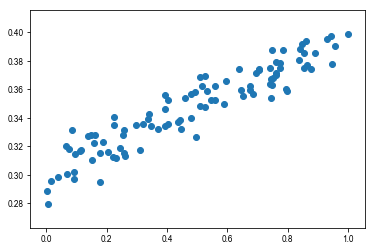

In [54]:
x_train, y_train = make_noisy_data()
plt.scatter(x_train, y_train)

Since TF 1.4 there has been a shortcut on how to initialize a neural network for linear and logistic regressions, but I want to step through this bit by bit without using the wrapper.

First we need to initialize our inputs. Since we have 1-dimensional vectors of shape we pass `[None]`. The `name` is what the node will be referred to in the graph.

In [11]:
LOGDIR = './graphs'
tf.reset_default_graph()
sess = tf.Session()

with tf.name_scope('input'):
    x_placeholder = tf.placeholder(shape=[None], dtype=tf.float32, name='x-input')
    y_placeholder = tf.placeholder(shape=[None], dtype=tf.float32, name='y-input')

Now we need to initialize our model. We have a relatively simple one

$y = mx + b$

where we need to fit the values of $m$ and $b$.

In [12]:
with tf.name_scope('model'):
    m = tf.Variable(tf.random_normal([1]), name='m')
    b = tf.Variable(tf.random_normal([1]), name='b')
    y = m * x_placeholder + b

If you want to, you can look at what the variable attributes

In [55]:
print(m)

<tf.Variable 'model/m:0' shape=(1,) dtype=float32_ref>


And then we can set up how to train the model

In [14]:
LEARNING_RATE = 0.5

with tf.name_scope('training'):
    with tf.name_scope('loss'):
        loss = tf.reduce_mean(tf.square(y - y_placeholder))
    with tf.name_scope('optimizer'):
        optimizer = tf.train.GradientDescentOptimizer(LEARNING_RATE)
        train = optimizer.minimize(loss) 

And the logging

In [15]:
# Write the graph
writer = tf.summary.FileWriter(LOGDIR)
writer.add_graph(sess.graph)

# Attach summaries to Tensors (for TensorBoard visualization)
tf.summary.histogram('m', m)
tf.summary.histogram('b', b)
tf.summary.scalar('loss', loss)

# This op will calculate our summary data when run
summary_op = tf.summary.merge_all()

Finally initialize all of our variables

In [56]:
sess.run(tf.global_variables_initializer())

And **finally** train our model

In [57]:
TRAIN_STEPS = 201

for step in range(TRAIN_STEPS):
    
    # Session will run two ops:
    # - summary_op prepares summary data we'll write to disk in a moment
    # - train will use the optimizer to adjust our variables to reduce loss
    summary_result, _ = sess.run([summary_op, train], 
                                  feed_dict={x_placeholder: x_train, 
                                             y_placeholder: y_train})
    # write the summary data to disk
    writer.add_summary(summary_result, step)
    
    # Uncomment the following two lines to watch training happen real time.
    if step % 20 == 0:
        print(step, sess.run([m, b]))
    
# close the writer when we're finished using it
writer.close()

0 [array([-1.4004653], dtype=float32), array([1.2124709], dtype=float32)]
20 [array([-0.32906827], dtype=float32), array([0.5210122], dtype=float32)]
40 [array([-0.02117912], dtype=float32), array([0.36150384], dtype=float32)]
60 [array([0.06292608], dtype=float32), array([0.3179314], dtype=float32)]
80 [array([0.08590087], dtype=float32), array([0.30602884], dtype=float32)]
100 [array([0.09217682], dtype=float32), array([0.30277747], dtype=float32)]
120 [array([0.09389123], dtype=float32), array([0.30188927], dtype=float32)]
140 [array([0.09435952], dtype=float32), array([0.30164665], dtype=float32)]
160 [array([0.09448745], dtype=float32), array([0.30158037], dtype=float32)]
180 [array([0.09452241], dtype=float32), array([0.30156228], dtype=float32)]
200 [array([0.09453193], dtype=float32), array([0.30155733], dtype=float32)]


In [ ]:
!tensorboard --logdir=graphs

W0314 14:39:48.729792 Reloader tf_logging.py:121] Found more than one graph event per run, or there was a metagraph containing a graph_def, as well as one or more graph events.  Overwriting the graph with the newest event.
TensorBoard 1.6.0 at http://delilah.research.northwestern.edu:6006 (Press CTRL+C to quit)


And if we wanted to make a prediction, we do it from the session

In [60]:
sess.run(y, feed_dict={x_placeholder: [2]})

TypeError: Fetch argument 0.0027437594 has invalid type <class 'numpy.float32'>, must be a string or Tensor. (Can not convert a float32 into a Tensor or Operation.)

The presentation is similar even if there are hidden layers on tensorboard - this model is for a neural network that is trained to identify handwritten digits. 

<img src='../images/l9_neuralnet_tf.png'></img>

Despite the complexity of a neural network, it fundamentally works the same as other approaches - **given some data, minimize the difference between the prediction and the truth**. 

# Word2Vec in Gensim

We can create our own word2vec model in tensorflow and train it, but gensim also has a built-in implementation that requires less boilerplate code and still retains most options.

In [62]:
sentences = [x.lower().split() for x in ["Human machine interface for lab abc computer applications",
                                         "A survey of user opinion of computer system response time",
                                         "The EPS user interface management system",
                                         "System and human system engineering testing of EPS",              
                                         "Relation of user perceived response time to error measurement",
                                         "The generation of random binary unordered trees",
                                         "The intersection graph of paths in trees",
                                         "Graph minors IV Widths of trees and well quasi ordering",
                                         "Graph minors A survey"]]
sentences

[['human',
  'machine',
  'interface',
  'for',
  'lab',
  'abc',
  'computer',
  'applications'],
 ['a',
  'survey',
  'of',
  'user',
  'opinion',
  'of',
  'computer',
  'system',
  'response',
  'time'],
 ['the', 'eps', 'user', 'interface', 'management', 'system'],
 ['system', 'and', 'human', 'system', 'engineering', 'testing', 'of', 'eps'],
 ['relation',
  'of',
  'user',
  'perceived',
  'response',
  'time',
  'to',
  'error',
  'measurement'],
 ['the', 'generation', 'of', 'random', 'binary', 'unordered', 'trees'],
 ['the', 'intersection', 'graph', 'of', 'paths', 'in', 'trees'],
 ['graph',
  'minors',
  'iv',
  'widths',
  'of',
  'trees',
  'and',
  'well',
  'quasi',
  'ordering'],
 ['graph', 'minors', 'a', 'survey']]

In [63]:
import gensim as gs
#and we can create a model in one shot if we wanted to.
model = gs.models.Word2Vec(sentences, min_count=1, sg=0, seed=1)

And that's it to get up and running. `sg=1` sets Word2Vec to use skip-grams, while `sg=0` sets Word2Vec to use continuous bag of words. 

We could double check what the vector size is (although this is set when we initialize the model)

In [64]:
model.vector_size

100

And check on the vocabulary constructed from the dataset.

In [65]:
model.wv.vocab

{'a': <gensim.models.keyedvectors.Vocab at 0x12ad5ba90>,
 'abc': <gensim.models.keyedvectors.Vocab at 0x12ad5b2e8>,
 'and': <gensim.models.keyedvectors.Vocab at 0x128e27898>,
 'applications': <gensim.models.keyedvectors.Vocab at 0x128e27c18>,
 'binary': <gensim.models.keyedvectors.Vocab at 0x128e27630>,
 'computer': <gensim.models.keyedvectors.Vocab at 0x127a45128>,
 'engineering': <gensim.models.keyedvectors.Vocab at 0x12ad5bfd0>,
 'eps': <gensim.models.keyedvectors.Vocab at 0x128e304a8>,
 'error': <gensim.models.keyedvectors.Vocab at 0x12ad5bd30>,
 'for': <gensim.models.keyedvectors.Vocab at 0x12ad5be10>,
 'generation': <gensim.models.keyedvectors.Vocab at 0x128e27e80>,
 'graph': <gensim.models.keyedvectors.Vocab at 0x12ad5b320>,
 'human': <gensim.models.keyedvectors.Vocab at 0x12ad5bb38>,
 'in': <gensim.models.keyedvectors.Vocab at 0x128e27828>,
 'interface': <gensim.models.keyedvectors.Vocab at 0x128e27780>,
 'intersection': <gensim.models.keyedvectors.Vocab at 0x1288ad550>,
 'iv':

And using one of the words, pull its vector out.

In [66]:
model.wv['trees']

array([-1.8757612e-03, -4.7319234e-04,  3.2722126e-03,  2.2497734e-03,
        5.7675235e-04, -3.3369828e-03, -5.9189770e-04,  2.4842764e-03,
        2.9437519e-03, -3.5409196e-03, -3.5105918e-03,  3.9636032e-03,
        4.3576895e-03, -3.4558952e-03,  2.0270431e-03,  4.4895136e-03,
       -6.2283350e-04,  2.7993477e-03, -3.8118288e-03,  4.6618399e-03,
       -8.1476173e-04, -4.0388289e-03,  4.7998149e-03,  4.8226924e-03,
        2.9142603e-04,  3.1670381e-03, -3.4044476e-03,  3.3604444e-03,
       -4.1117126e-04,  2.9597636e-03, -2.0896606e-03,  2.3171999e-03,
       -1.2737218e-03, -1.5220185e-03, -5.4983393e-04, -3.5039487e-03,
        3.7361132e-03,  2.0248561e-04, -2.0674497e-03, -2.7755958e-03,
        1.1062289e-03,  2.3397398e-03, -3.9555025e-03, -4.2651822e-03,
       -4.0524257e-03, -3.1199944e-03, -4.7368946e-04,  2.4604066e-03,
        4.0410273e-03,  3.5808871e-03, -3.4900266e-03, -2.0412036e-04,
        2.4673962e-03, -3.5575256e-03, -8.8068936e-04,  2.9842425e-03,
      

And ask it to predict a word given context.

In [67]:
model.predict_output_word(['graph', 'trees'])

[('widths', 0.023809697),
 ('in', 0.023809645),
 ('to', 0.02380964),
 ('management', 0.023809629),
 ('generation', 0.023809612),
 ('abc', 0.023809597),
 ('measurement', 0.023809597),
 ('engineering', 0.023809597),
 ('minors', 0.023809597),
 ('time', 0.023809586)]

We could pull out the vector weigths for all of the vocabulary words and attempt to look at them also.

Pull out all of the words and plot the first two dimensions with the word labels.

In [71]:
model.wv.vocab

{'a': <gensim.models.keyedvectors.Vocab at 0x12ad5ba90>,
 'abc': <gensim.models.keyedvectors.Vocab at 0x12ad5b2e8>,
 'and': <gensim.models.keyedvectors.Vocab at 0x128e27898>,
 'applications': <gensim.models.keyedvectors.Vocab at 0x128e27c18>,
 'binary': <gensim.models.keyedvectors.Vocab at 0x128e27630>,
 'computer': <gensim.models.keyedvectors.Vocab at 0x127a45128>,
 'engineering': <gensim.models.keyedvectors.Vocab at 0x12ad5bfd0>,
 'eps': <gensim.models.keyedvectors.Vocab at 0x128e304a8>,
 'error': <gensim.models.keyedvectors.Vocab at 0x12ad5bd30>,
 'for': <gensim.models.keyedvectors.Vocab at 0x12ad5be10>,
 'generation': <gensim.models.keyedvectors.Vocab at 0x128e27e80>,
 'graph': <gensim.models.keyedvectors.Vocab at 0x12ad5b320>,
 'human': <gensim.models.keyedvectors.Vocab at 0x12ad5bb38>,
 'in': <gensim.models.keyedvectors.Vocab at 0x128e27828>,
 'interface': <gensim.models.keyedvectors.Vocab at 0x128e27780>,
 'intersection': <gensim.models.keyedvectors.Vocab at 0x1288ad550>,
 'iv':

In [72]:
#Answer
%matplotlib inline
import matplotlib.pyplot as plt

wmatrix = model.wv[model.wv.vocab]
wmatrix

array([[ 7.5315032e-04, -4.7117346e-03, -1.3489460e-03, ...,
         1.3975860e-03, -1.2840990e-03, -2.7784328e-03],
       [-2.3028678e-03, -1.7590391e-03, -2.8763628e-03, ...,
         1.0258728e-03, -6.5197368e-05,  6.6207728e-04],
       [-2.4418500e-03, -2.4909498e-03,  4.4182390e-03, ...,
         3.0470255e-04, -4.0977416e-03, -1.6439663e-03],
       ...,
       [ 3.4845711e-03, -1.1401968e-03, -3.4697964e-03, ...,
         2.0500970e-04, -3.7193936e-03,  5.9963035e-04],
       [ 4.0004309e-03,  1.9127020e-03,  3.6180494e-03, ...,
         4.3768142e-03,  2.4273666e-03, -4.5993342e-03],
       [-4.4385851e-03,  2.7437594e-03,  1.6281867e-03, ...,
         2.6957537e-03,  3.7378701e-03, -2.2523322e-03]], dtype=float32)

(-0.005, 0.006)

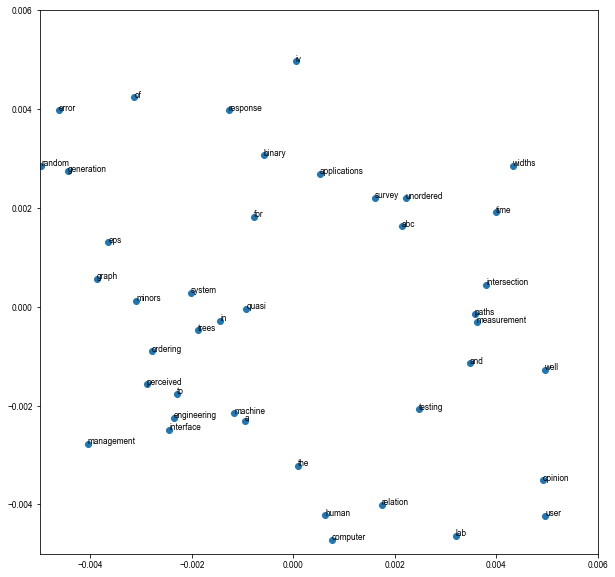

In [73]:
xdata = wmatrix[:,0]
ydata = wmatrix[:,1]


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.scatter(xdata, ydata)
for x,y,word in zip(xdata, ydata, model.wv.vocab):
    ax.text(x,y,word)
ax.set_xlim(-0.0050, 0.0060)
ax.set_ylim(-0.0050, 0.0060)

# Visualizing the maximum variance

Picking two dimensions at random isn't a good way to visualize the embedding, since the algorithm is relying on all 100 dimensions to describe the words (i.e. all dimensions are working to create the optimal embedding).

Since we lack the ability to plot/view 100 dimensions simultaneously our best bet is to employ **dimensionality reduction** and create optimally weighted axes across dimensions to capture the variance within the data.

# Principal Component Analysis (PCA)

PCA is a commonly used dimensionality reduction algorithm. It works by transforming a set of data observations into a set of linearly uncorrelated variables (the components). The difference between PCA and Factor Analysis is that the components are orthogonal (i.e. components are at 90 degree angles from one another). The calculation of these components is based on the eigenvectors of the data matrix (which is also what guarantees us that the components are orthogonal).

We can use the scikit learn implementation of PCA

In [74]:
from sklearn.decomposition import PCA




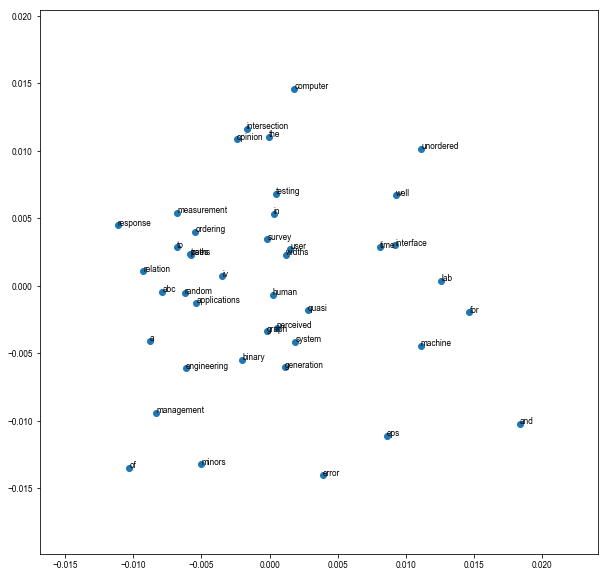

In [75]:
#Answer
pca = PCA(n_components=2)
result = pca.fit_transform(wmatrix)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.scatter(result[:,0], result[:,1])
for coord,word in zip(result, model.wv.vocab):
    ax.text(coord[0], coord[1], word)

# Moving forward

And this is as far as we can possibly take this example text. To **actually** train a word embedding, you need a massive dataset. 

In lieu of that, we can load up trained representations that someone else has already done. We will use the Stanford Global Vectors for Word Representation (GloVe), since it is a smaller file size than Google's trained word2vec.

https://nlp.stanford.edu/projects/glove/

You can move the downloaded folder into our `data/` folder.

In [76]:
ls ../data/glove/

glove.6B.100d.txt           glove.6B.300d.txt
glove.6B.100d.word2vec.txt  glove.6B.50d.txt
glove.6B.200d.txt


There are four files that GloVe supplies, they were all trained on the same corpus but with different sized vectors (vector size is marked in the filename). 

We will keep working with the 100 dimension vector. Unlike the google datasets (which are in a standard word2vec format), we need to convert the GloVe dataset to a word2vec format.

In [77]:
from gensim.scripts.glove2word2vec import glove2word2vec
glove_input_file = '../data/glove/glove.6B.100d.txt'
word2vec_output_file = '../data/glove/glove.6B.100d.word2vec.txt'
glove2word2vec(glove_input_file, word2vec_output_file)

(400000, 100)

And now we can read this word2vec file the same as we could one that we downloaded directly from Google.

In [78]:
from gensim.models import KeyedVectors

glove_model = KeyedVectors.load_word2vec_format(word2vec_output_file)

With a large, well-trained dataset we can start pulling out the famous examples also.

`king - man + woman = ?`

In [79]:
result = glove_model.most_similar(positive=['woman', 'king'], negative=['man'])
result

[('queen', 0.7698541283607483),
 ('monarch', 0.6843380928039551),
 ('throne', 0.6755737066268921),
 ('daughter', 0.6594555974006653),
 ('princess', 0.6520534157752991),
 ('prince', 0.6517034769058228),
 ('elizabeth', 0.6464517712593079),
 ('mother', 0.6311717629432678),
 ('emperor', 0.6106470823287964),
 ('wife', 0.6098655462265015)]

## How does this work?

Everything is based off of vectors. Given two data points, they each have a vector from the origin.

<img src='../images/l19_vector_origin.jpg' width='300px'></img>

# Vector addition works by stacking the vectors

If we add `King+Man`, then we have a resultant vector that is the length of both.

<img src='../images/l19_vector_addition.jpg' width='300px'></img>

# Vector subtraction requires 'flipping' the subtracted vector

<img src='../images/l19_vector_subtraction.jpg' width='300px'></img>

# Similarity between two vectors is based off of the angle between them

<img src='../images/l19_cosine_1.jpg' width='300px'></img>
<img src='../images/l19_cosine_2.jpg' width='300px'></img>

In [80]:
glove_model.most_similar(positive=['cat', 'puppy'], negative=['kitten'])

[('dog', 0.8002570867538452),
 ('dogs', 0.675112783908844),
 ('pig', 0.6540138125419617),
 ('horse', 0.6384344696998596),
 ('rabbit', 0.6239069104194641),
 ('pet', 0.6193716526031494),
 ('chicken', 0.6041175723075867),
 ('cats', 0.5998529195785522),
 ('hog', 0.5978538393974304),
 ('duck', 0.5851622819900513)]

In [81]:
glove_model.most_similar(positive=['dog', 'kitten'], negative=['puppy'])

[('cat', 0.6935380101203918),
 ('dogs', 0.5759751796722412),
 ('monkey', 0.5692905187606812),
 ('pet', 0.5661199688911438),
 ('girl', 0.5220829248428345),
 ('creature', 0.5160893797874451),
 ('cats', 0.5131915807723999),
 ('boy', 0.5122600793838501),
 ('animal', 0.5092933773994446),
 ('rat', 0.5076236128807068)]

When testing these relationships, they work by essentially asking for a relationship with the missing word in the 'negative' list and it doesn't work any which way.

In [82]:
glove_model.most_similar(positive=['dog', 'puppy'], negative=['cat'])

[('puppies', 0.6649416089057922),
 ('retriever', 0.6418952941894531),
 ('rottweiler', 0.6218166947364807),
 ('dogs', 0.598397433757782),
 ('sled', 0.582977831363678),
 ('goat', 0.5631861686706543),
 ('pug', 0.5608721375465393),
 ('hound', 0.5599592924118042),
 ('kitten', 0.5586523413658142),
 ('pig', 0.5579670667648315)]

We can further extend this 'play' with other examples. If we enter in one word then we are effectively asking for the nearest neighbors.

In [83]:
glove_model.most_similar(positive=['frog'])

[('toad', 0.7010514140129089),
 ('snake', 0.657115638256073),
 ('frogs', 0.6290439367294312),
 ('monkey', 0.6214002966880798),
 ('turtle', 0.6097555160522461),
 ('spider', 0.6079937219619751),
 ('ape', 0.5917872786521912),
 ('litoria', 0.585466206073761),
 ('rabbit', 0.5832657217979431),
 ('squirrel', 0.577958881855011)]

In [84]:
glove_model.most_similar(positive=['puppy'])

[('puppies', 0.7518181800842285),
 ('dog', 0.723637580871582),
 ('kitten', 0.6905402541160583),
 ('retriever', 0.6884320378303528),
 ('cat', 0.6800068616867065),
 ('hound', 0.6328635215759277),
 ('rottweiler', 0.6270608305931091),
 ('pug', 0.6259523630142212),
 ('kittens', 0.6209099292755127),
 ('pig', 0.6129595041275024)]

And there can be interesting matches given a multi-word concept.

In [85]:
glove_model.most_similar(positive = ['slow', 'slower', 'slowest'])

[('pace', 0.8061383366584778),
 ('faster', 0.8025360107421875),
 ('slowing', 0.7939368486404419),
 ('slowed', 0.764470636844635),
 ('sluggish', 0.7292846441268921),
 ('growth', 0.7181570529937744),
 ('fast', 0.7115045785903931),
 ('fastest', 0.711225688457489),
 ('accelerating', 0.6772849559783936),
 ('decline', 0.6701204776763916)]

# How do you test the 'goodness'

Despite the fact that we have set this problem up as a *prediction* one to fit the optimal weights in the neural network, this is still an unsupervised problem (i.e. we are choosing that the nearby context words are either the input or the output).

The **best** test that we possibly have is to see if our trained weights can replicate already agreed upon relationships.

As a part of the original word2vec project, they supplied `questions-words.txt` which has a large number of these analogies.

In [87]:
headers = [line.strip() for line in open('../data/questions-words.txt').readlines() if ':' in line]
headers

[': capital-common-countries',
 ': capital-world',
 ': currency',
 ': city-in-state',
 ': family',
 ': gram1-adjective-to-adverb',
 ': gram2-opposite',
 ': gram3-comparative',
 ': gram4-superlative',
 ': gram5-present-participle',
 ': gram6-nationality-adjective',
 ': gram7-past-tense',
 ': gram8-plural',
 ': gram9-plural-verbs']

The type of relationships are encoded in the lines that start with a ':'

In [88]:
phrases = [l.lower().strip().split() for l in open('../data/questions-words.txt').readlines() if ':' not in l]

In [90]:
phrases[:10]

[['athens', 'greece', 'baghdad', 'iraq'],
 ['athens', 'greece', 'bangkok', 'thailand'],
 ['athens', 'greece', 'beijing', 'china'],
 ['athens', 'greece', 'berlin', 'germany'],
 ['athens', 'greece', 'bern', 'switzerland'],
 ['athens', 'greece', 'cairo', 'egypt'],
 ['athens', 'greece', 'canberra', 'australia'],
 ['athens', 'greece', 'hanoi', 'vietnam'],
 ['athens', 'greece', 'havana', 'cuba'],
 ['athens', 'greece', 'helsinki', 'finland']]

And then we can test to see if the trained embeddings can reproduce the expected relationships.

All of the lines are set up as 

`x2 - x1 + x3 = x4`

In [91]:
for p in phrases[:10]:
    print(glove_model.most_similar(positive=[p[1], p[2]], negative=[p[0]], topn=1), p[3])

[('iraq', 0.7903197407722473)] iraq
[('thailand', 0.8054632544517517)] thailand
[('china', 0.8546513915061951)] china
[('germany', 0.810121476650238)] germany
[('switzerland', 0.6416415572166443)] switzerland
[('egypt', 0.7953351736068726)] egypt
[('zealand', 0.6756799817085266)] australia
[('laos', 0.6971369981765747)] vietnam
[('cuba', 0.7504730224609375)] cuba
[('finland', 0.7269078493118286)] finland


We can test this using the `accuracy` function off of a word2vec model to test the entire accuracy for the whole dataset. It will automatically separate the test set by section.

In [92]:
results = glove_model.accuracy('../data/questions-words.txt')

In [93]:
for h, section in zip(headers, results):
    print(len(section['correct'])/(len(section['correct']) + len(section['incorrect'])), h)

0.9426877470355731 : capital-common-countries
0.8939226519337017 : capital-world
0.17796610169491525 : currency
0.31230140717203814 : city-in-state
0.8771929824561403 : family
0.2206896551724138 : gram1-adjective-to-adverb
0.23421052631578948 : gram2-opposite
0.7935435435435435 : gram3-comparative
0.5983333333333334 : gram4-superlative
0.6946236559139785 : gram5-present-participle
0.9487889273356401 : gram6-nationality-adjective
0.5544871794871795 : gram7-past-tense
0.7793560606060606 : gram8-plural
0.5797720797720798 : gram9-plural-verbs


To test a non-standard embedding, you would need to establish these analogies yourself. Given the number of basic parameters you can tweak (including the window size and training speed), there is a distinct need to test the goodness of fit.

# Expanding beyond words

Moving beyond a word to sentence is a more complex task than it may appear, since it must also encode the word structure within the sentence. 

Using word2vec, we could create the average vector over all words in a sentence and then search for similar average vectors from other words. However, there is an extension of `word2vec`, `doc2vec`, that is included in gensim that works much better at the phrase, paragraph, and document level.